# **Lab Gradient Descent: Linear Regression**

### **Activity 1. Warmup**



In [3]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### **Activity 2. Load data and preprocessing**

In [4]:
# Create pandas DataFrame from “50_startups.csv” file
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# Extract Input and Output
x = data.iloc[:,[0,1,2]].values
y = data.iloc[:,-1:].values
print(x.shape)
print(y.shape)

(50, 3)
(50, 1)


In [6]:
# Split the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(40, 3) (10, 3)
(40, 1) (10, 1)


In [7]:
# Input normalization
X_max = X_train.max(axis=0, keepdims=True)
X_min = X_train.min(axis=0, keepdims=True)
print(X_max.shape, X_min.shape)
print(X_max)
print(X_min)

(1, 3) (1, 3)
[[165349.2  182645.56 471784.1 ]]
[[    0.   51283.14     0.  ]]


In [8]:
X_train_scaled = (X_train - X_min)/(X_max - X_min)
print(X_train_scaled.min(), X_train_scaled.max())

0.0 1.0


In [9]:
X_test_scaled = (X_test - X_min)/(X_max - X_min)
print(X_test_scaled.min(), X_test_scaled.max())

0.0 0.7782360434590044


In [10]:
# Output normalization
y_mean = y_train.mean(axis=0, keepdims=True)
y_std=y_train.std(axis=0,keepdims=True)

y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

print(y_train_scaled.max(), y_train_scaled.min())
print(y_test_scaled.max(), y_test_scaled.min())


1.8464513788878065 -2.433579441809424
0.449636647684142 -1.9276315184465596


### **Activity 3. Xây dựng và huấn luyện mô hình**

In [11]:
# Predict model
def predict(X,w):
  y_pred = np.dot(X, w.T)
  return y_pred

# Loss function
def loss(X, y,w):
  y_pred = predict(X,w)
  return np.mean((y_pred-y)**2)

# Gradients
def grad(X,y,w):
  y_pred = predict(X,w)
  delta = y_pred-y
  dw = np.dot(X.T,delta)
  return dw.T

In [12]:
# Gradient Descent
w = np.zeros((1,3))
l_rate = 0.01
epoch = 100
l = loss(X_train_scaled, y_train_scaled, w)
print(f"Initial loss: ",l)
history = [l]
for i in range(epoch):
  l = loss(X_train_scaled, y_train_scaled, w)
  dw = grad(X_train_scaled, y_train_scaled, w)
  w -= l_rate*dw
print(f"Final loss: ",l)

Initial loss:  1.0
Final loss:  0.2783395482101783


# **Code hàm LinearRegression và đánh giá mô hình dựa trên tập dữ liệu test set.**

In [13]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias to zero
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent for n_iters iterations
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [14]:
model = LinearRegression(lr=0.01, n_iters=1000000)
model.fit(X_train_scaled, y_train_scaled.T[0,:])
y_pred = model.predict(X_test_scaled)

# **Lập hàm và tính MSE, MAE, RMSE dựa trên tập pred và tập test**

In [15]:
# Mean squared error
def mean_squared_error(y_test, y_pred):
    sum_of_squared_errors = 0
    for i in range(len(y_test)):
        error = y_test[i] - y_pred[i]
        sum_of_squared_errors += error**2
    mse = sum_of_squared_errors / len(y_test)
    return mse

# Root mean squared error
def root_mean_squared_error(y_test, y_pred):
    return math.sqrt(mean_squared_error(y_test, y_pred))

# Mean absolute error
def mean_absolute_error(y_test, y_pred):
    absolute_errors = []
    for i in range(len(y_test)):
        error = abs(y_test[i] - y_pred[i])
        absolute_errors.append(error)
    mae = sum(absolute_errors) / len(y_test)
    return mae

In [16]:
mse = mean_squared_error(y_test_scaled, y_pred)
mae = mean_absolute_error(y_test_scaled, y_pred)
rmse = root_mean_squared_error(y_test_scaled, y_pred)
print("MSE: {0}".format(mse))
print("MAE: {0}".format(mae))
print("RMSE: {0}".format(rmse))

MSE: [0.04701034]
MAE: [0.16821103]
RMSE: 0.21681867815320063


# **Thêm hệ số bias và đánh giá mô hình dựa trên tập dữ liệu test set.**


In [17]:
bias = np.ones((X_train.shape[0],1))
X_train_scaled = np.hstack((bias,X_train_scaled));

In [18]:
bias = np.ones((X_test.shape[0],1))
X_test_scaled = np.hstack((bias,X_test_scaled));

In [19]:
w = np.zeros((1,4))
l_rate = 0.01
epoch = 1000
l = loss(X_train_scaled, y_train_scaled, w)
print(f"Initial loss: ",l)
history = [l]
for i in range(epoch):
  l = loss(X_train_scaled, y_train_scaled, w)
  dw = grad(X_train_scaled, y_train_scaled, w)
  w -= l_rate*dw
  history.append(l)
print(f"Final loss: ",l)

Initial loss:  1.0
Final loss:  0.04640777934696909


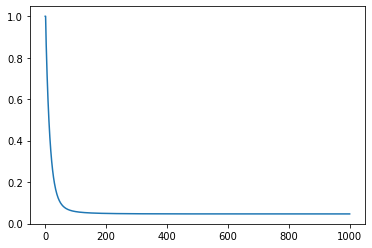

In [20]:
plt.plot(history)
plt.show()

In [21]:
model = LinearRegression(lr=0.01, n_iters=1000000)
model.fit(X_train_scaled, y_train_scaled.T[0,:])
y_pred = model.predict(X_test_scaled)

In [22]:
mse = mean_squared_error(y_test_scaled, y_pred)
mae = mean_absolute_error(y_test_scaled, y_pred)
rmse = root_mean_squared_error(y_test_scaled, y_pred)
print("MSE: {0}".format(mse))
print("MAE: {0}".format(mae))
print("RMSE: {0}".format(rmse))

MSE: [0.04701034]
MAE: [0.16821103]
RMSE: 0.21681867815320546


In [23]:
# Using Scikit Learn libraries to calculate errors

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

model = LinearRegression(fit_intercept=True)
model.fit(X_train_scaled, y_train_scaled)

# Evaluate the model on the test data
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
mae = mean_absolute_error(y_test_scaled, y_pred)
rmse = math.sqrt(mse)

# Print the evaluation metrics
print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("Root mean squared error: ", rmse)


Mean squared error:  0.04701033919609864
Mean absolute error:  0.1682110283350694
Root mean squared error:  0.21681867815319472


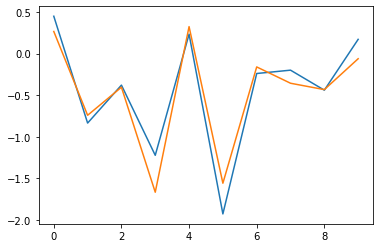

In [24]:
plt.plot(y_test_scaled)
plt.plot(y_pred)
plt.show()